#Исследование

##Обучим нейронную сеть на белых цифрах

In [54]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras.datasets import mnist # Набор данных mnist
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Работа с изображениями
from random import randint


In [55]:
# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

# Загружаем набор данных (датасет) MNIST
(x_train, y_train_original), (x_test, y_test_original) = mnist.load_data()

print("Размер обучающей выборки")
print(x_train.shape)
print()

print("Размер тестовой выборки")
print(x_test.shape)



Размер обучающей выборки
(60000, 28, 28)

Размер тестовой выборки
(10000, 28, 28)


Вывод изображений выборок

In [56]:
# # Выводим для примера картинки из x_train и результаты ответов из y_train

# # Создаем полотно из 10 графиков
# fig, axs = plt.subplots(1, 10, figsize=(25, 3)) 

# y = ''
# for i in range(10): # Будем выводить 10 элементов
#   index = randint(0, 60000)
#   img = x_train[index] # Выбираем из x_train случайное изображение
#   y += str(y_train_original[index]) + " " # Записываем верный ответ на изображение
#   axs[i].imshow(Image.fromarray(img), cmap='gray') # Добавляем изображение в коллекцию

# plt.show() #Показываем изображения
# print("\nLabels: ", y) # Выводим верные ответы

# # # Выводим для примера картинки из x_test и результаты ответов из y_test

# # Создаем полотно из 10 графиков
# fig, axs = plt.subplots(1, 10, figsize=(25, 3)) 

# y = ''
# for i in range(10): # Будем выводить 10 элементов
#   index = randint(0, 10000)
#   img = x_test[index] # Выбираем из x_test случайное изображение
#   y += str(y_test_original[index]) + " " # Записываем верный ответ на изображение
#   axs[i].imshow(Image.fromarray(img), cmap='gray') # Добавляем изображение в коллекцию

# plt.show() #Показываем изображения
# print("\nLabels: ", y) # Выводим верные ответы

##Обучим нейронную сеть на чёрных цифрах

Изменение цвета изображений в выборках

In [57]:
# Изменение цвета цифр в обучающей выборке

for img in x_train: # Проход по картинкам
  for pixel in range(len(img)): # Проход по пикселям изображений
    img[pixel]= 255 - img[pixel] # Реверсия цвета

for img in x_test: # Проход по картинкам
  for pixel in range(len(img)): # Проход по пикселям изображений
    img[pixel]= 255 - img[pixel] # Реверсия цвета


Вывод выборок с измененными цветами

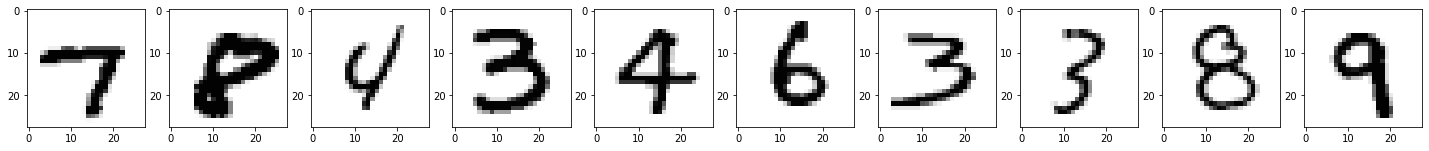


Labels:  7 8 4 3 4 6 3 3 8 9 


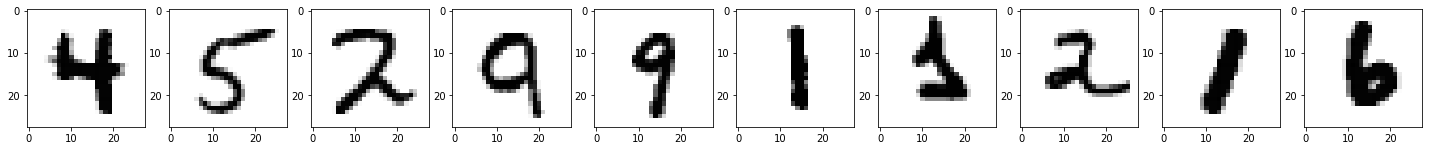


Labels:  4 5 2 9 9 1 1 2 1 6 


In [58]:
# Выводим для примера картинки из x_train и результаты ответов из y_train

# Создаем полотно из 10 графиков
fig, axs = plt.subplots(1, 10, figsize=(25, 3)) 

y = ''
for i in range(10): # Будем выводить 10 элементов
  index = randint(0, 60000)
  img = x_train[index] # Выбираем из x_train случайное изображение
  y += str(y_train_original[index]) + " " # Записываем верный ответ на изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # Добавляем изображение в коллекцию

plt.show() #Показываем изображения
print("\nLabels: ", y) # Выводим верные ответы

# # Выводим для примера картинки из x_test и результаты ответов из y_test

# Создаем полотно из 10 графиков
fig, axs = plt.subplots(1, 10, figsize=(25, 3)) 

y = ''
for i in range(10): # Будем выводить 10 элементов
  index = randint(0, 10000)
  img = x_test[index] # Выбираем из x_test случайное изображение
  y += str(y_test_original[index]) + " " # Записываем верный ответ на изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # Добавляем изображение в коллекцию

plt.show() #Показываем изображения
print("\nLabels: ", y) # Выводим верные ответы

In [59]:
# Превращаем y_train и y_test сетей в формат one hot encoding
# Т.е.верный ответ преобразуется в вероятности, с которми изображение является тем или иным объектом. 
y_train = utils.to_categorical(y_train_original, 10)
y_test = utils.to_categorical(y_test_original, 10)

print("Обучающая выборка:")
print(y_train_original[5], "->", y_train[5])
print(y_train_original[234], "->", y_train[234])
print(y_train_original[55477], "->", y_train[55477])
print(y_train_original[14848], "->", y_train[14848])
print()

print("Проверочная выборка:")
print(y_train_original[15], "->", y_train[15])
print(y_train_original[334], "->", y_train[334])
print(y_train_original[8477], "->", y_train[8477])
print(y_train_original[3768], "->", y_train[3768])



Обучающая выборка:
2 -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
9 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
6 -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

Проверочная выборка:
7 -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
9 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
4 -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [60]:
# Преобразуем наши картинки в последовательности цифр (выравнивание)

x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

print("Размерность x_train: ", x_train.shape)
print("Размерность x_test: ", x_test.shape)



Размерность x_train:  (60000, 784)
Размерность x_test:  (10000, 784)


In [61]:
# Нормализация картинок приведение значения пикселя в диапозоно от о до 1:

print("Изначальные значения:")
print(x_train[10][120:135]) #120:135 - вывод значений из опр. диапозона
print()

x_train = x_train / 255
x_test = x_test / 255

print("Значения после нормализации:")
print(x_train[10][120:135])



Изначальные значения:
[255 255 255 213 137  36  89 137 137 249 255 255 255 255 255]

Значения после нормализации:
[1.         1.         1.         0.83529412 0.5372549  0.14117647
 0.34901961 0.5372549  0.5372549  0.97647059 1.         1.
 1.         1.         1.        ]


In [62]:
# Задаём batch_size. # Кол. эл. выборки, с которыми будут учиться до изменения весов.
batch_size = 128

# Создаем последовательную модель нейронной сети
model = Sequential()
# Выравнивающий слой
model.add(Dense(300, input_dim=784, activation='relu'))
# Полносвязный скрытый слой
model.add(Dense(50, activation='relu'))
# Слой классификации
model.add(Dense(10, activation='softmax'))

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_28 (Dense)             (None, 50)                15050     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                510       
Total params: 251,060
Trainable params: 251,060
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
375/375 [==============================] - 4s 9ms/step - loss: 0.6927 - accuracy: 0.8023 - val_loss: 0.3627 - val_accuracy: 0.8924
Epoch 2/5
375/375 [==============================] - 3s 8ms/step - loss: 0.3691 - accuracy: 0.8896 - val_loss: 0.2874 - val_accuracy: 0.9173
Epoch 3/5
375/375 [==============================] - 3s 8ms/step - loss: 0.3209 - accuracy: 0.9039 - val_loss: 0.2995 - val_accuracy: 0.9097
Epoch 4/5
375/375 [==============================] - 3s 8ms/step - loss: 0.2806 - accuracy: 0.9166 - val_loss: 0.2596 - val_accuracy: 0.9263
Epoch 5/5
375/375 [==============================] - 3s 8ms/step - loss: 0.2473 - accuracy: 0.9259 - val_loss: 0.2245 - val_accuracy: 0.9347


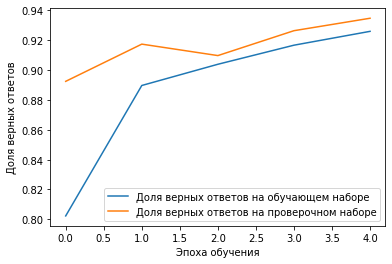

In [63]:
# Обучаем нейросеть

#Обучаем сеть на данных mnist
history = model.fit(x_train, # Сюда подаются нормализованные изображения
                    y_train, 
                    batch_size=batch_size, 
                    epochs=5,
                    validation_split=0.2,
                    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


#Вывод: 
Нейронная сеть распознает цифры с одной и той же точностью вне зависимости от их цвета